Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 06: Wavelet Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, January 6, 2025**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is intended to revise the notions of eigenvectors and eigenvalues, which will pop up in class soon.  Check if you are comfortable with them. You don't need a deep understanding, but you should have got the basic ideas.  If you have problems to answer these questions offhand, this is a good time to look terms up (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Assignment 1: Filter design and frequency space (5 points)

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the kernel size. What do you observe?

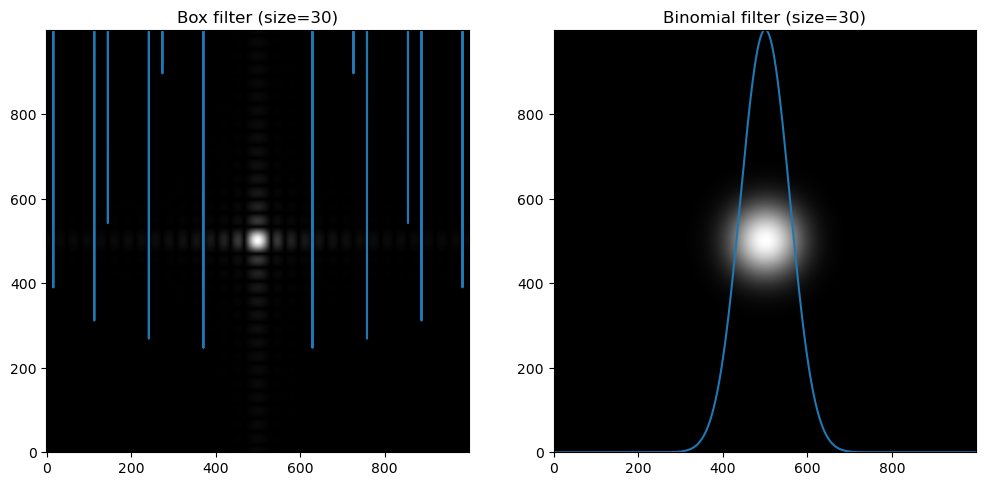

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.ndimage import convolve

kernel_size = 30 # vary this #20 , 22, 24, 26, 28, 30
image_size = 1000

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

# YOUR CODE HERE
# compute box kernel
box_kernel[image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1,
           image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1] = 1


# compute binomial kernel
# create binomial coefficients
binomial_coeffs = binom(kernel_size, np.arange(kernel_size + 1))
binomial_1d = binomial_coeffs / binomial_coeffs.sum()  # Normalize to sum to 1
# create 2d binomial kernel by using outer product with itself
binomial_kernel_2d = np.outer(binomial_1d, binomial_1d) #
# kernel
binomial_kernel[image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1,
                image_size//2 - kernel_size//2 : image_size//2 + kernel_size//2 + 1] = binomial_kernel_2d


box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

box filter: sharp edges, sinc-like pattern, narrower/shorter by increasing kernel size 
binomial filter: gaussian curve, becomes narrower by increasing kernel size


**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_{\max}$. What do you observe? Explain that observation and discuss how to improve the result.

Hint: The low pass filter is shown in CV-06 slides 45. 

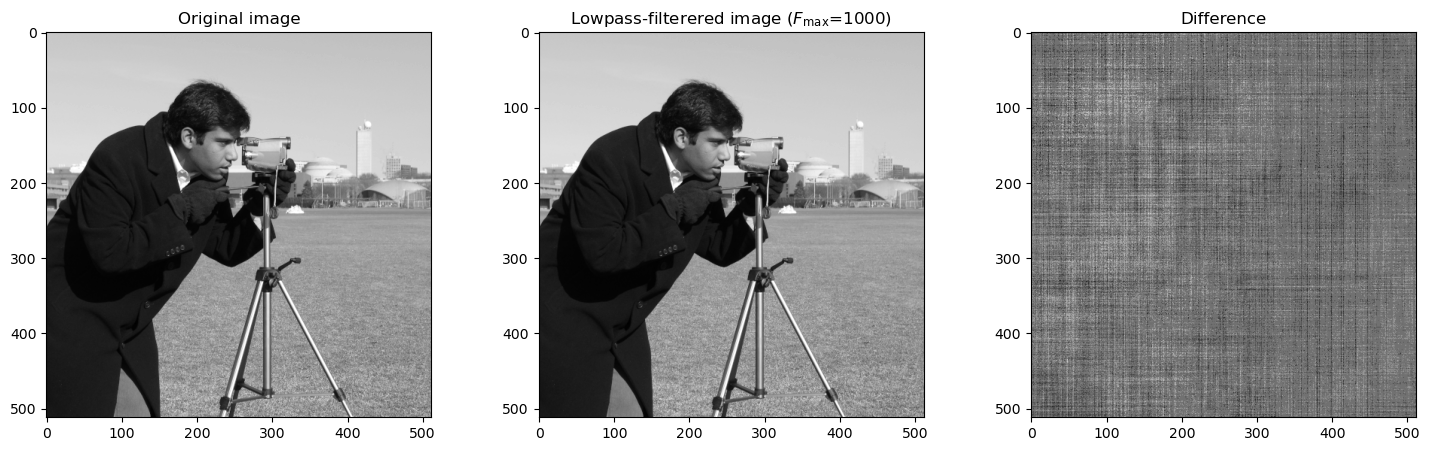

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

f_max = 1000
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    #result = image

     # YOUR CODE HERE
    # FFT of the image
    fft_image= np.fft.fftshift(np.fft.fft2(image))

    #low-pass filter (u,v = rows,columns (cordinates))
    u,v = image.shape
    cor_u, cor_v = u // 2, v//2
    mask = np.zeros((u,v), dtype=float)

    # apply function in frquency space
    for i in range(u):
        for j in range(v):
            if np.sqrt((i - cor_u)**2 + (j - cor_v)**2) <= f_max:
                mask[i,j] = 1
    
    # inverse Fourier Transform
    filtered_image = np.fft.ifft2(np.fft.ifftshift(fft_image*mask))
    result = np.abs(filtered_image)
    return result

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

high f_max: more high frequencys -> more noise and less attenuation
low f_max: removing noise and high frequencies, loss of information

improvement: 
+ no aprupt but smooth cut-off
+ apply series of filter and successively increase f_max

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

Good kernel size based on standard deviation to take most of the gaussian bell-shaped curve into account.

"Faustformel" = Sigma*3

## Assignment 2: Discrete Cosine Transform (5 points)

**a)** Read up about the DCT and IDCT functions and check out the scipy implementation.

In [ ]:
import numpy as np
import imageio.v3 as iio
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct

In [ ]:
def dct_2d_sp(array, type_=2):
    return dct(dct(array, axis=0, type=type_), axis=1, type=type_)

def idct_2d_sp(array, type_=2):
    return idct(idct(array, axis=0, type=type_), axis=1, type=type_)


img = iio.imread("imageio:camera.png")
img_transformed = dct_2d_sp(img)
img_orig = idct_2d_sp(img_transformed)

plt.subplot(131); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(132); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')
plt.subplot(133); plt.imshow(img_orig); plt.axis('off'); plt.title('Restored Image')

**b)** Implement the DCT-II function given by the formula: $C_k = 2 \sum_{n=0}^{N-1} f_n \cos\left(\frac{\pi k(2n+1)}{2N} \right)$

In [ ]:
def my_dct2_1d(f, axis=0):
    C = np.zeros_like(f, dtype=np.float64)
    # YOUR CODE HERE
    raise NotImplementedError()
    return C


def my_dct2_2d(f):
    return my_dct2_1d(my_dct2_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct2_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type_=2).round()).all())

**c)** Implement the DCT-III function given by the formula: $C_k = f_0 + 2 \sum_{n=1}^{N-1} f_n \cos\left(\frac{\pi(2k+1)n}{2N}\right)$

In [ ]:
def my_dct3_1d(f, axis=0):
    C = np.zeros_like(f, dtype=np.float64)
    # YOUR CODE HERE
    raise NotImplementedError()
    return C


def my_dct3_2d(f):
    return my_dct3_1d(my_dct3_1d(f, axis=0), axis=1)


img = iio.imread("imageio:camera.png")
img_transformed = my_dct3_2d(img)

plt.subplot(121); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(122); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')

print((img_transformed.round() == dct_2d_sp(img, type_=3).round()).all())

**d)** What relationship between the DCT-II, DCT-III, IDCT-II and IDCT-III can be observed? Demonstrate your findings. (If you did not solve exercises b and c, you may use provided `dct_2d_sp` function).

In [ ]:
normalize = lambda x: x.astype(np.float64)/np.max(x)

img = iio.imread("imageio:camera.png")
img = normalize(img)

# YOUR CODE HERE
raise NotImplementedError()
img_orig = normalize(img_orig)

plt.subplot(131); plt.imshow(img); plt.axis('off'); plt.title('Original Image')
plt.subplot(132); plt.imshow(img_transformed); plt.axis('off'); plt.title('Transformed Image')
plt.subplot(133); plt.imshow(img_orig); plt.axis('off'); plt.title('Restored Image')

print((img.round() == img_orig.round()).all())

## Assignment 3: Wavelet Transform (5 points)

**a)** Write a function that transforms a mother wavelet into a wavelet function.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def wavelet(mother_wavelet, s=0, d=0):
    func = lambda x: mother_wavelet.__call__(x)  # edit this call to be dependent on s and d
    # YOUR CODE HERE
    raise NotImplementedError()
    return func


**b)** Write a function for the Gabor mother wavelet.

In [ ]:
def gabor_mother_wavelet(x, sigma=1, k=1):
    ret = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    return ret

**c)** Plot the real and imaginary part of the gabor wavelet. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
plt.legend()
plt.title("Gabor Wavelet Function")
plt.show()

**d)** Plot the real and imaginary part of the gabor wavelet in 3d. Use the Interval $\left[ -10, 10 \right]$ and $\sigma=3$.

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")
# YOUR CODE HERE
raise NotImplementedError()
ax.set_xlabel("X axis")
ax.set_ylabel("$\Re(e^{ix})$")
ax.set_zlabel("$\Im(e^{ix})$")
plt.show()

**e)** Implement the Haar Basis Wavelet and the Haar Scale Wavelet.

In [ ]:
def haar_basis_wavelet(x):
    ret = np.zeros(x.shape)
    # YOUR CODE HERE
    raise NotImplementedError()
    return ret


def haar_scale_wavelet(x):
    ret = np.zeros(x.shape)
    # YOUR CODE HERE
    raise NotImplementedError()
    return ret

x = np.linspace(-1, 3, 100)
plt.grid()
plt.plot(x, haar_basis_wavelet(x), label="Basis Wavelet $\psi$")
plt.plot(x, haar_scale_wavelet(x), label="Scaling Wavelet $\phi$")
plt.legend()
plt.title("Haar Wavelet Function")
plt.show()